In [1]:
import matplotlib.pyplot as plt
import numpy as np

from datasets.mnist import MNIST

from models.cae_model import CAE
from models.conv_model import CNN

from train import train_ae, train_cnn

from cem import ContrastiveExplanationMethod

In [2]:
dataset = MNIST()
# dataset = FashionMNIST()

# Training the classifier

In [3]:
cnn = CNN()

train_cnn(cnn, dataset, iterations=2, lr=0.001, device='cpu', save_fn='mnist-cnn', load_path="./models/saved_models/b_mnist-cnn.h5")

In [4]:
images, _ = dataset.get_batch()

output = cnn(images)

images = images.numpy()
output = output.detach().numpy()


D:\david\Coding\uva-fact-ai\models\conv_model.py:50: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = nn.functional.softmax(out)


# Training the autoencoder

This section trains the autoencoder which will be used as regularizer for the data space which the perturbations are found in.

In [5]:
# Train or load autoencoder
cae = CAE()

train_ae(cae, dataset, iterations=2, save_fn="mnist-cae", load_path="./models/saved_models/b-mnist-cae.h5")

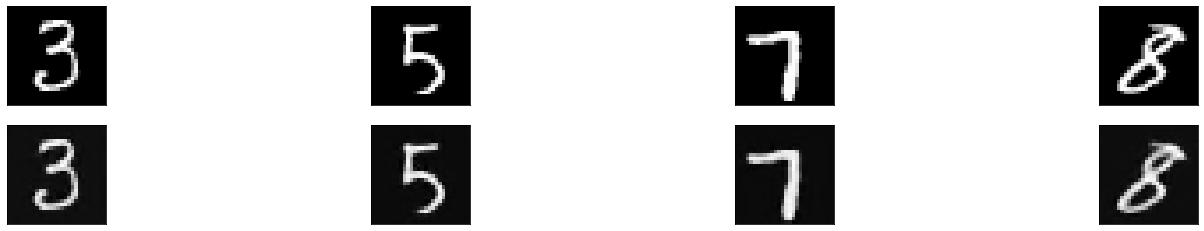

In [6]:
# obtain one batch of test images
images, _ = dataset.get_batch()

#images_flatten = images.view(images.size(0), -1)
# get sample outputs
output = cae(images)
# prep images for display
images = images.numpy()

# output is resized into a batch of images
# output = output.view(batch_size, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# Contrastive Explanation Method

In [7]:
CEM = ContrastiveExplanationMethod(cnn, cae, iterations=500, n_searches=9, kappa=10, gamma=50)

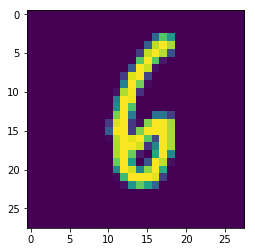

In [8]:
# obtain one sample
image, _ = dataset.get_sample()

plt.imshow(image.squeeze())

In [9]:
# find pertinent negatives
CEM.fista(image, mode="PN")

search: 0 - iteration: 0 - c value:10.00 - loss: 315.80 - delta sum: 0.00 - has reached optimum: False
NEW BEST: 1180.222900390625 - C: 10
search: 0 - iteration: 20 - c value:10.00 - loss: 9462.00 - delta sum: 270.26 - has reached optimum: True
search: 0 - iteration: 40 - c value:10.00 - loss: 10531.07 - delta sum: 272.53 - has reached optimum: True
search: 0 - iteration: 60 - c value:10.00 - loss: 10795.76 - delta sum: 269.64 - has reached optimum: True
search: 0 - iteration: 80 - c value:10.00 - loss: 11115.96 - delta sum: 273.13 - has reached optimum: True
search: 0 - iteration: 100 - c value:10.00 - loss: 11503.99 - delta sum: 277.69 - has reached optimum: True
search: 0 - iteration: 120 - c value:10.00 - loss: 11615.50 - delta sum: 276.52 - has reached optimum: True
search: 0 - iteration: 140 - c value:10.00 - loss: 11746.33 - delta sum: 277.84 - has reached optimum: True
search: 0 - iteration: 160 - c value:10.00 - loss: 11773.26 - delta sum: 277.37 - has reached optimum: True
se

search: 3 - iteration: 20 - c value:1.34 - loss: 10209.96 - delta sum: 269.75 - has reached optimum: True
search: 3 - iteration: 40 - c value:1.34 - loss: 11057.13 - delta sum: 271.59 - has reached optimum: True
search: 3 - iteration: 60 - c value:1.34 - loss: 11427.19 - delta sum: 270.15 - has reached optimum: True
search: 3 - iteration: 80 - c value:1.34 - loss: 11604.22 - delta sum: 271.55 - has reached optimum: True
search: 3 - iteration: 100 - c value:1.34 - loss: 11564.17 - delta sum: 270.30 - has reached optimum: True
search: 3 - iteration: 120 - c value:1.34 - loss: 11680.13 - delta sum: 269.72 - has reached optimum: True
search: 3 - iteration: 140 - c value:1.34 - loss: 11876.04 - delta sum: 271.93 - has reached optimum: True
search: 3 - iteration: 160 - c value:1.34 - loss: 11838.84 - delta sum: 271.00 - has reached optimum: True
search: 3 - iteration: 180 - c value:1.34 - loss: 11807.06 - delta sum: 269.15 - has reached optimum: True
search: 3 - iteration: 200 - c value:1.34

search: 6 - iteration: 40 - c value:0.25 - loss: 11085.53 - delta sum: 271.00 - has reached optimum: True
search: 6 - iteration: 60 - c value:0.25 - loss: 11427.75 - delta sum: 271.30 - has reached optimum: True
search: 6 - iteration: 80 - c value:0.25 - loss: 11490.49 - delta sum: 269.61 - has reached optimum: True
search: 6 - iteration: 100 - c value:0.25 - loss: 11374.52 - delta sum: 269.32 - has reached optimum: True
search: 6 - iteration: 120 - c value:0.25 - loss: 11481.61 - delta sum: 268.74 - has reached optimum: True
search: 6 - iteration: 140 - c value:0.25 - loss: 11457.44 - delta sum: 269.03 - has reached optimum: True
search: 6 - iteration: 160 - c value:0.25 - loss: 11632.14 - delta sum: 268.85 - has reached optimum: True
search: 6 - iteration: 180 - c value:0.25 - loss: 11482.56 - delta sum: 269.66 - has reached optimum: True
search: 6 - iteration: 200 - c value:0.25 - loss: 11453.50 - delta sum: 267.67 - has reached optimum: True
search: 6 - iteration: 220 - c value:0.2

In [10]:
# import os
# os.environ["PATH"] += os.pathsep + 'D:/Program Files/Graphviz/bin'

# from torchviz import make_dot
# make_dot(CEM.loss).view()

In [11]:
print(CEM.best_delta - image.view(28*28))

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0492, 0.1249, 0.0768, 0.0594, 0.0000,
        0.0000, 0.0000, 0.0290, 0.0823, 0.1465, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.2445, 0.1049, 0.0715, 0.0000, 0.0528,
        0.0255, 0.0186, 0.0000, 0.0000, 0.0000, 0.1178, 0.1914, 0.0020, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.1242, 0.3774, 0.2623, 0.2303, 0.1444,
        0.3330, 0.4666, 0.2557, 0.0000, 0.0000, 0.0000, 0.0000, 0.2856, 0.3342,
        0.0567, 0.0000, 0.0281, 0.0000, 0.1213, 0.0000, 0.0000, 0.0320, 0.1152,
        0.0000, 0.1115, 0.0000, 0.0000, 0.0243, 0.1685, 0.1105, 0.0456, 0.3061,
        0.5000, 0.2298, 0.0000, 0.0913, 0.0000, 0.0000, 0.0000, 0.0000, 0.2003,
        0.3135, 0.3327, 0.0000, 0.1949, 0.5000, 0.2842, 0.0563, 0.0018, 0.0383,
        0.1006, 0.4796, 0.4652, 0.0266, 

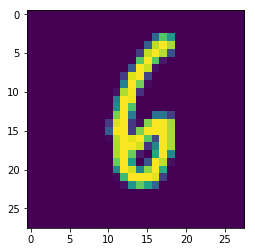

In [12]:
plt.imshow(image.squeeze())

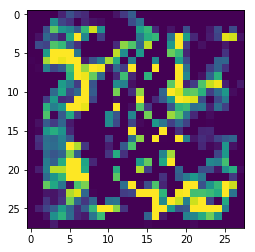

In [13]:
plt.imshow(CEM.best_delta.view(28,28) - image.squeeze())

In [14]:
# classification after
np.argmax(cnn(CEM.best_delta.view(1,28,28)).detach())

tensor(8)

In [15]:
# classification before
np.argmax(cnn(image.squeeze(-1)).detach())

tensor(6)

In [16]:
print(CEM.best_loss)

1171.203369140625


In [17]:
print(CEM.best_pert_loss)

tensor(0.)


In [18]:
print(CEM.best_c)

10


D:\david\Coding\uva-fact-ai\models\conv_model.py:50: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = nn.functional.softmax(out)


True

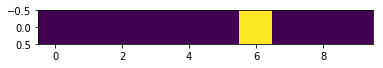

In [41]:
# latest delta
plt.imshow(cnn(CEM.prev_deltas[-1].view(1, 28, 28)).detach())